<a href="https://colab.research.google.com/github/hsargoli/MyWorks/blob/main/introductionDataS_pandasNumpyScipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **numpy** 

# **pandas**

# **SKlearn**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('ggplot')

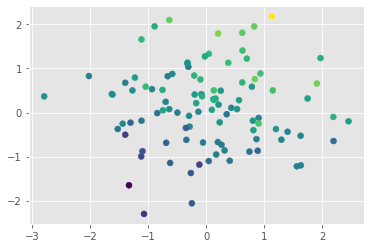

In [ ]:
# Create random dataset
from sklearn.datasets import make_classification, make_regression, make_blobs
x, y = make_classification(n_samples = 100,
    n_features = 3,
    n_informative = 3, 
    n_redundant = 0,
    n_classes = 4,
    weights = [.25, .15, .2, .3],
    random_state = 1)
x1, y1, coed = make_regression(n_samples = 100,
    n_features = 3,
    n_informative = 3,
    n_targets = 1,
    noise = 0.0,
    coef = True,
    random_state = 1)
x2, y2 = make_blobs(n_samples = 100,
    n_features = 2,
    centers = 3,
    cluster_std = 0.5,
    shuffle = True,
    random_state = 1)

plt.scatter(x1[:,0], x1[:,1], c=y1)
plt.show()

In [ ]:
# Random numbers
np.random.seed(0)
print(
np.random.random(3), # create random number between 0 1 
np.random.randint(1,40,5), # create random number (from,to,num)
sep = '\n')

[0.5488135  0.71518937 0.60276338]
[ 4 10 20 22 37]


columns  Index(['account number', 'name', 'sku', 'quantity', 'unit price', 'ext price',
       'date'],
      dtype='object')
Index(['account number', 'name', 'sku', 'quantity', 'priceu', 'exprice',
       'date'],
      dtype='object')
Covarinace matrix of arr: 
 [[0.33333333 0.83333333 0.5       ]
 [0.83333333 2.33333333 1.5       ]
 [0.5        1.5        1.        ]]


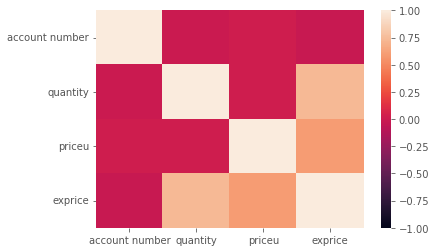

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

print('columns ',df.columns)  # return columns name 

df = df.rename(columns = {'unit price':'priceu','ext price':'exprice'})
print(df.columns)  # return columns name 

np.cov(df.quantity, df.priceu)
# ============================================================================
# The Numpy cov() function is used to measure the strength of correlation
# between two or more than two sets of variables is called covariance.
arr = np.array([[1, 1, 2], [1, 2, 4], [3, 4, 5]])
   
print("Covarinace matrix of arr: \n", np.cov(arr))
# ============================================================================
corr = df.corr() # depict correlation between numeric values
sb.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, vmin = -1, vmax = +1)

In [ ]:
df

,account number,name,sku,quantity,priceu,exprice,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
1495,737550,"Fritsch, Russel and Anderson",S1-06532,12,55.80,669.60,2014-12-30 13:38:13
1496,786968,"Frami, Hills and Schmidt",S1-06532,37,13.14,486.18,2014-12-30 21:42:17
1497,239344,Stokes LLC,S2-10342,14,38.75,542.50,2014-12-30 22:45:19
1498,642753,Pollich LLC,S2-82423,3,65.97,197.91,2014-12-31 10:36:24


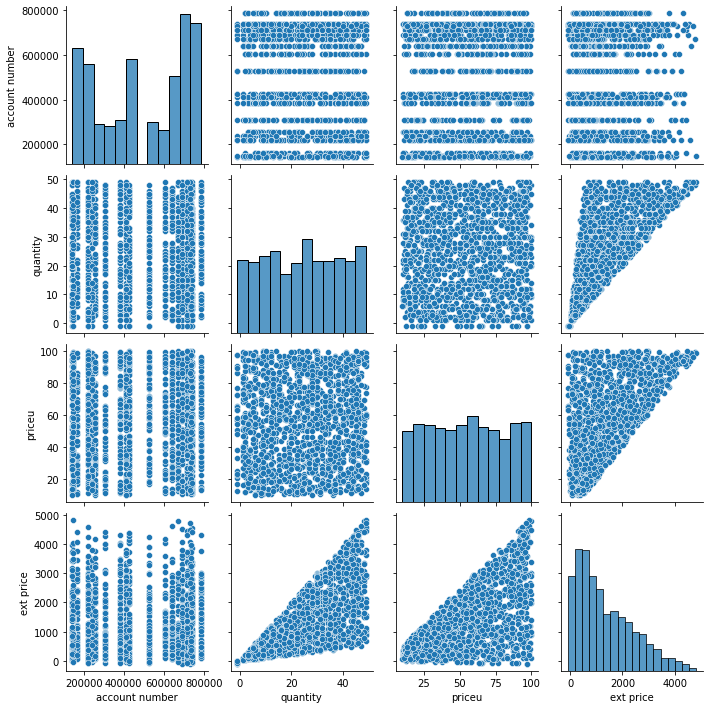

In [ ]:
sb.pairplot(df)

# Correlation

In [ ]:
# pearson 
from scipy.stats import pearsonr
pearson_coef, p_value = pearsonr(df.quantity, df.priceu)
print(f'coef :{pearson_coef}, p_value: {p_value}')

coef :0.02326690657290525, p_value: 0.3678573696099714


In [ ]:
# SPEARman correlation
from scipy.stats import spearmanr
spearman_coef, p_value = spearmanr(df.exprice, df.priceu)
print(f'coef :{spearman_coef}, p_value: {p_value}')

coef :0.5741825250806364, p_value: 2.7360366114796826e-132


In [ ]:
# chi square TEST 
# for categorical data
# -------------------------------------------------
# Investigate whether events are independent or relevant
# -------------------------------------------------
# P_VALUE : It is a mistake to reject the null hypothesis and accept the alternative hypothesis 
# if p_value > 0.05 fail to reject null hypothesis
# if p_value < 0.05 we can reject null hypothesis
# -------------------------------------------------
# Expectadet Table 
# -------------------------------------------------
# Degree of freedom 
# -------------------------------------------------
# chi2 = Sum [(Observed_data - expectadet_data)**2/expectadet_data]
# -------------------------------------------------
from scipy.stats import chi2_contingency

observed_data = pd.crosstab(df.name, df.sku) 
chi2, p_value, degreeOfFreedom, expected = chi2_contingency(observed_data.values)
if p_value > 0.05:
  print('null hypothesis is correct')
else:
  print('null hypothesis is rejected')

null hypothesis is correct


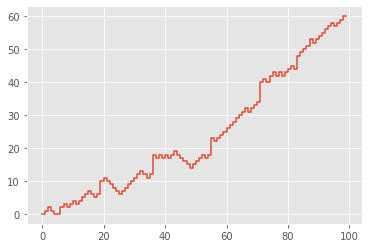

In [ ]:
# Random walk game
# if dice 1 or 2  --> step -1
# if dice 3 4 5 --> step +1
# if dice is 6 --> step + next dice number
t = 100
step = 0
steps = []
while t > 0 :
  dice = np.random.randint(1,7)
  if dice <3:
    step = max(0, step-1)
  elif dice <= 5:
    step += 1
  else:
    num = np.random.randint(1,7)
    step += num
  steps.append(step)
  t -= 1

plt.step(np.arange(100),steps)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


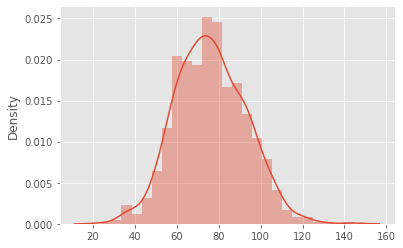

In [ ]:
report = np.empty(0)
for _ in range(1000):
  t = 100
  step = 0
  steps = []
  while t > 0 :
    dice = np.random.randint(1,7)
    if dice <3:
      step = max(0, step-1)
    elif dice <= 5:
      step += 1
    else:
      num = np.random.randint(1,7)
      step += num
    steps.append(step)
    t -= 1
  report = np.append(report, steps[-1])
sb.distplot(report)

In [ ]:
np.mean(report)
np.std(report)

16.724778952201433

# PREprocessing

In [4]:
import pandas as pd
data = pd.read_csv('bank.csv', sep=';')

data.describe()  # describe the dataset

data = data.rename({'education':'edu'})

data.columns # columns of dataset

data.info() # info about dataset

data.isnull() # return objects of dataset True for null 

data.fillna({'job':'unemployd','balance':'zero'}) # fill na values of dataset

data.fillna(method = 'ffill') # fill na values with previous data in dataset
data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 635.8+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
data[data.duplicated()] # returns rows with duplicate data
data.drop_duplicates() # drops every duplicated data
data.drop_duplicates(['job']) # drops job columns duplicated data
data.reset_index(drop = True, inplace = True) # reset index and drop previous indexes

In [6]:
data.job.value_counts() # Count special columns

# Group by 
new_data = data.groupby(data['job']) # set each job in index and recreate dataset based on them
print(new_data.median())

# crosstab 
pd.crosstab(data.job, data.housing) # job as index and housing as columns

                age  balance   day  duration  campaign  pdays  previous
job                                                                    
admin.         38.0    430.0  17.0     161.0       2.0   -1.0       0.0
blue-collar    39.0    408.5  15.0     204.0       2.0   -1.0       0.0
entrepreneur   41.0    365.5  16.0     195.0       2.0   -1.0       0.0
housemaid      49.0    296.5  15.0     183.0       2.0   -1.0       0.0
management     38.0    577.0  17.0     176.0       2.0   -1.0       0.0
retired        59.0    672.5  15.0     206.0       2.0   -1.0       0.0
self-employed  40.0    483.0  17.0     174.0       2.0   -1.0       0.0
services       37.0    288.0  15.0     185.0       2.0   -1.0       0.0
student        26.0    422.5  16.0     194.5       2.0   -1.0       0.0
technician     38.0    434.5  16.5     181.5       2.0   -1.0       0.0
unemployed     41.0    473.5  15.5     210.0       2.0   -1.0       0.0
unknown        49.5    655.5  13.0     156.5       2.0   -1.0   

housing,no,yes
job,,
admin.,176,302
blue-collar,251,695
entrepreneur,74,94
housemaid,73,39
management,466,503
retired,180,50
self-employed,95,88
services,132,285
student,64,20


In [ ]:
# pivot table 
pd.pivot_table(data, index = 'marital', columns = 'loan') 
# set selected row and column to mpre info

age                 balance              campaign            \
loan             no        yes           no         yes        no       yes   
marital                                                                       
divorced  45.593607  44.900000  1170.778539  886.900000  2.621005  2.522222   
married   43.670648  42.335541  1554.146758  992.578366  2.801195  3.086093   
single    33.913168  34.027027  1567.132634  704.736486  2.766221  2.648649   

                day               duration                  pdays             \
loan             no        yes          no         yes         no        yes   
marital                                                                        
divorced  15.769406  15.677778  283.052511  260.644444  43.865297  14.311111   
married   15.901024  15.931567  256.473123  256.816777  39.261945  34.353201   
single    16.070611  15.567568  274.746183  273.574324  44.013359  37.608108   

          previous            
loan            no       yes  
marital                       
divorced  0.504566  0.122222  
married   0.529010  0.467991  
single    0.646947  0.614865

In [ ]:
# convert categorical data into numeric data
data2 = data.drop(['job','marital','education','month','age', 'default', 'balance', 'housing', 'loan', 'contact', 'day',],axis = 1)
pd.get_dummies(data2)

,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,79,1,-1,0,0,0,0,1,1,0
1,220,1,339,4,1,0,0,0,1,0
2,185,1,330,1,1,0,0,0,1,0
3,199,4,-1,0,0,0,0,1,1,0
4,226,1,-1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
4516,329,5,-1,0,0,0,0,1,1,0
4517,153,1,-1,0,0,0,0,1,1,0
4518,151,11,-1,0,0,0,0,1,1,0
4519,129,4,211,3,0,1,0,0,1,0


In [ ]:
data.duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


array([1.61764706, 2.05882353, 2.35294118, ..., 5.58823529, 1.32352941,
       3.67647059])

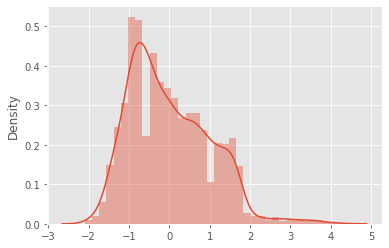

In [ ]:
# normalize data 
import seaborn as sb
from sklearn.preprocessing import scale, normalize, minmax_scale
# scale is Z score  x-mean / std 
# normalize  x / |x| - > norm in manhatan its sum(|x1| + |x2| + ...)
# in euclidance is sqrt(sum(x1**2 + x2**2 +...))
# minmax_scale distributed data in min and max scale 
scale_age = scale(data.age)
sb.distplot(scale_age)
normalize_data = normalize([data.duration,data.age], norm='l1', axis = 1)
scaled_data = minmax_scale(data.age, feature_range = (0,10))
scaled_data

In [ ]:
# quartile 
df = pd.DataFrame(np.array([1,5,6,9,12,25,220]))
df.quantile(0.2)


def percentile(data,k):
    n = len(data)
    p = (k * n)/100
    c = p - int(p)
    if c: # p isnt integer
      return data[int(p)]
    else: # p is integer
      return (data[int(p)] + data[int(p) - 1]) / 2
    return p
percentile([1,5,6,9,12,25,220],50)
df.quantile(0.5)

9

In [ ]:
# who is the OUTLIER?
up_extrem = q3 + (1.5 * iqr) # iqr == interquartile range
down_extrem = q1 - (1.5 * iqr) # iqr == interquartile range
# if some data greater than up_extrem or lower than down extrem, its OUTLIER
# box plots are best way for detecting and visualizing outliers

0    9.0
Name: 0.5, dtype: float64

In [ ]:
# design style of table
data.head().style.set_table_styles(
    [{'selector': 'tr:hover',
      'props': 'background-color: yellow; font-size: 1em;'}])


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Iris dataset

In [16]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(f'shape of data = {iris.data.shape}\n iris describe = {iris.DESCR}')


shape of data = (150, 4)
 iris describe = .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ========

In [21]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


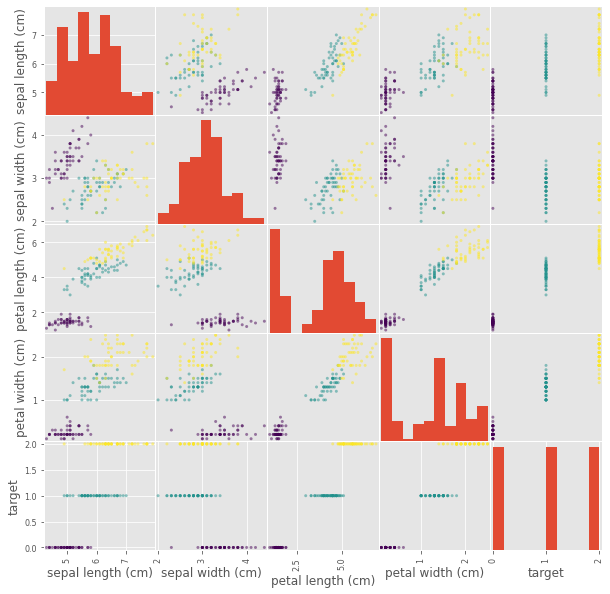

In [30]:
pd.plotting.scatter_matrix(iris_df, c=iris.target,figsize = [10,10])
plt.show()

------
# machin learning algorithms
------

In [44]:
# KNN 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 42, stratify = y)


knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
x_n = np.array([[5,4,3,2]])
ypred = knn.predict(x_test)
knn.score(x_test, y_test)

0.9333333333333333

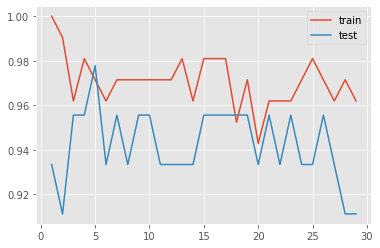

In [47]:
neighbors = np.arange(1,30)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i,j in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = j)
  knn.fit(x_train, y_train)
  train_acc[i] = knn.score(x_train, y_train)
  test_acc[i] = knn.score(x_test, y_test)

plt.plot(neighbors, train_acc, label = 'train')
plt.plot(neighbors, test_acc, label = 'test')
plt.legend()

In [49]:
# decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
ypred = dtc.predict(x_test)

metrics.accuracy_score(y_test, ypred)
# or use dtc.score


0.9777777777777777

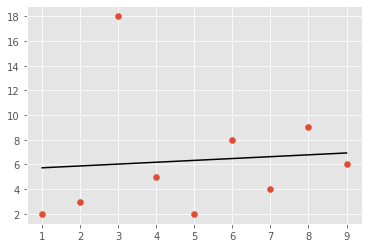

In [60]:
from matplotlib.collections import LineCollection
# regression 
from sklearn.linear_model import LinearRegression

x = np.arange(1,10).reshape(-1,1)
y = np.array([2,3,18,5,2,8,4,9,6]).reshape(-1,1)


reg = LinearRegression()
reg.fit(x,y)

ypred = reg.predict(x)

plt.scatter(x,y)
plt.plot(x,ypred, c = 'k')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
a = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(a)
print(f'mse {a} / Rmse {rmse}')

mse 0.375 / Rmse 0.6123724356957945


In [88]:
# kfold cross validation 
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
cv_score = cross_val_score(reg, x, y, cv=2)
np.mean(cv_score)

-0.03730909422270823

In [ ]:
# feature selection #!